# Parameter sensitivity (Part 1)

### BickBuckt: Qb = K(S/Smax)^c

* paramtest1: Low K(1.0d-06) and C = 1(linear)
* paramtest2: Low K(1.0d-06) and C = 10(exp)
* paramtest3: High K(0.1) and C = 10(exp)
* paramtest4: High K(0.1) and C = 1(linear)
* paramtest5: Low K(1.0d-06) and C = 2, aquiferScaleFactor = 1 (default - 0.35)
* paramtest6: Low K(1.0d-06) and C = 2, aquiferScaleFactor = 0.2
* paramtest7: Low K(1.0d-06) and C = 3, aquiferScaleFactor = 50 
* paramtest8: Low K(1.0d-06) and C = 3, aquiferScaleFactor = 100
* paramtest9: Low K(1.0d-06) and C = 3, aquiferScaleFactor = 80



In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [2]:
# Observed streamflow
o = pd.read_csv('/glade/p/work/manab/SHARP/data/dly/obsflow.dly.HHDW1.csv')
o.rename(columns = {'Year':'time', 'cfs': 'flow'}, inplace=True)

o['flow'] = o['flow']*0.028316847 #Convert to CMS
o['time'] = pd.to_datetime(o['time'])  #convert to datetime format
o.loc[o['flow'] < 0 , 'flow'] = np.nan
o.fillna(method='ffill', limit=10)

o = o.set_index(['time'])
obs = o.to_xarray()

In [3]:
#Routed streamflows
t1 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest1.nc').set_index(sSeg = 'reachID')
t2 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest2.nc').set_index(sSeg = 'reachID')
t3 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest3.nc').set_index(sSeg = 'reachID')
t4 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest4.nc').set_index(sSeg = 'reachID')
t5 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest5.nc').set_index(sSeg = 'reachID')
t6 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest6.nc').set_index(sSeg = 'reachID')
t7 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest7.nc').set_index(sSeg = 'reachID')
t8 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest8.nc').set_index(sSeg = 'reachID')
t9 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest9.nc').set_index(sSeg = 'reachID')

# Full run analysis

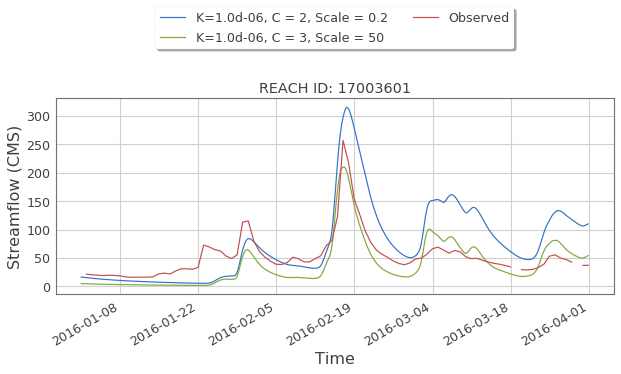

In [30]:
#Plotting all parameter tests
sid = 17003601
starttime1 = '2016-01-01'
endtime1 = '2016-03-31'

#PLOT
plt.figure(figsize=(10,4))

#t1.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=1.0d-06 , C = 1, Scale = 0.35')
#t2.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=1.0d-06 , C = 10, Scale = 0.35')
#t3.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=0.1 , C = 10, Scale = 0.35')
#t4.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=0.1 , C = 1, Scale = 0.35')
#t5.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=1.0d-06, C = 2, Scale = 1')
t6.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=1.0d-06, C = 2, Scale = 0.2')
t7.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=1.0d-06, C = 3, Scale = 50')
#t8.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=1.0d-06, C = 3, Scale = 100')
#t9.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime1:endtime1].plot(label='K=1.0d-06, C = 3, Scale = 80')
(obs['flow'].loc[starttime1:endtime1]).plot(label='Observed')


plt.ylabel('Streamflow (CMS)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.title('REACH ID: %i' %sid)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True, shadow=True)
#plt.savefig('figures/bigbucktparamsens.png', bbox_inches='tight', dpi=300)
plt.show()

In [103]:
#Plot forcing and diagnostic variables
hid = 17007511
out = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_3L/output/paramtestconcat1/paramtest1.nc').set_index(hru = 'hruId')
out['pptrate'] = out['pptrate']*3600      #kg m-2 s-1 -> mm/hr

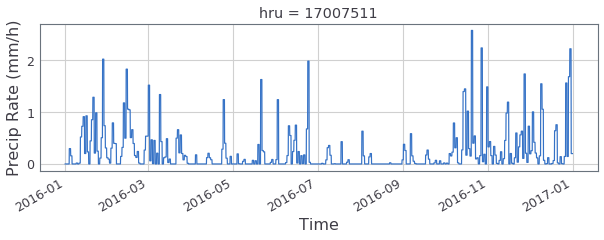

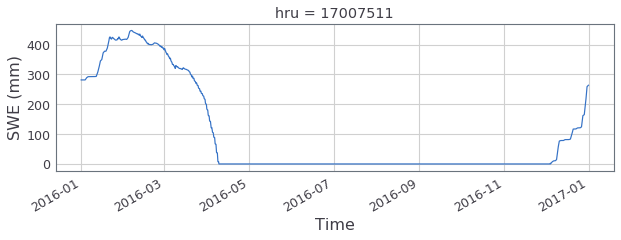

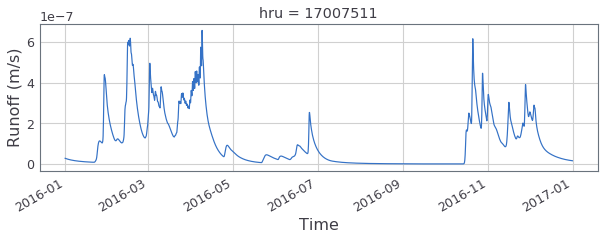

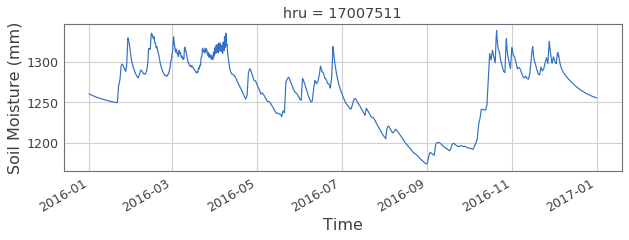

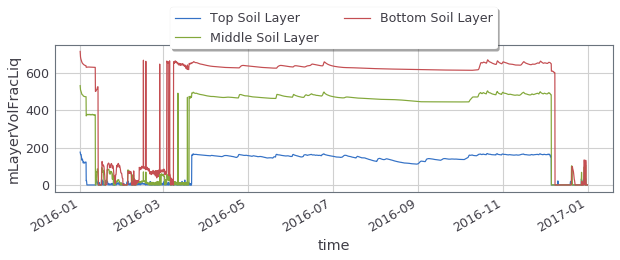

In [104]:
# PPTRATE
plt.figure(figsize=(10,3))
out.sel(hru = hid)['pptrate'].loc[starttime1:endtime1].plot()
plt.ylabel('Precip Rate (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/pptrate.png', bbox_inches='tight', dpi=300)
plt.show()

# SWE
plt.figure(figsize=(10,3))
out.sel(hru = hid)['scalarSWE'].loc[starttime1:endtime1].plot()
plt.ylabel('SWE (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/swe.png', bbox_inches='tight', dpi=300)
plt.show()

#averageInstantRunoff
plt.figure(figsize=(10,3))
out.sel(hru = hid)['averageInstantRunoff'].loc[starttime1:endtime1].plot()
plt.ylabel('Runoff (m/s)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/runoff.png', bbox_inches='tight', dpi=300)
plt.show()

#scalarTotalSoilWat
plt.figure(figsize=(10,3))
out.sel(hru = hid)['scalarTotalSoilWat'].loc[starttime1:endtime1].plot()
plt.ylabel('Soil Moisture (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/sm.png', bbox_inches='tight', dpi=300)
plt.show()

#mLayerVolFracLiq
iden_water = 1000

df2 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_3L/output/test/concat.nc').set_index(hru='hruId')
plt.figure(figsize=(10,3))
(df2.sel(hru = hid)['mLayerVolFracLiq'][:, 0]*iden_water*0.5).plot(label='Top Soil Layer')
(df2.sel(hru = hid)['mLayerVolFracLiq'][:, 1]*iden_water*1.5).plot(label='Middle Soil Layer')
(df2.sel(hru = hid)['mLayerVolFracLiq'][:, 2]*iden_water*2.0).plot(label='Bottom Soil Layer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=True)
plt.show()

# Partial run analysis


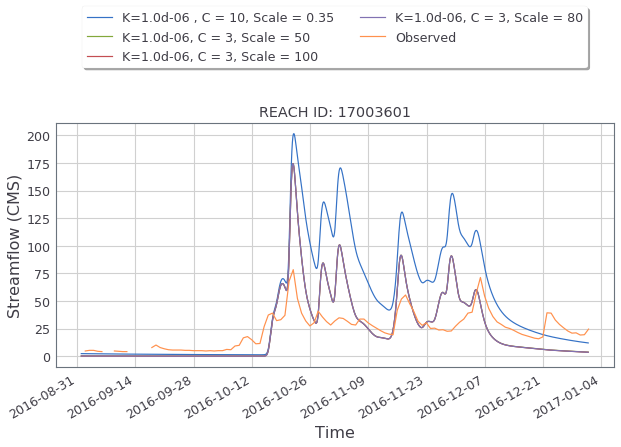

In [105]:
#Plotting all parameter tests
sid = 17003601
starttime = '2016-09-01'
endtime = '2016-12-31'

#PLOT
plt.figure(figsize=(10,5))

#t1.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06 , C = 1, Scale = 0.35')
t2.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06 , C = 10, Scale = 0.35')
#t3.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=0.1 , C = 10, Scale = 0.35')
#t4.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=0.1 , C = 1, Scale = 0.35')
#t5.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 2, Scale = 1')
#t6.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 2, Scale = 0.2')
t7.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 3, Scale = 50')
t8.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 3, Scale = 100')
t9.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 3, Scale = 80')
(obs['flow'].loc[starttime:endtime]).plot(label='Observed')


plt.ylabel('Streamflow (CMS)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.title('REACH ID: %i' %sid)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True, shadow=True)
plt.savefig('figures/bigbucktparamsens.png', bbox_inches='tight', dpi=300)
plt.show()

In [106]:
#Plot forcing and diagnostic variables
hid = 17007511
out = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_3L/output/paramtestconcat1/paramtest1.nc').set_index(hru = 'hruId')
out['pptrate'] = out['pptrate']*3600      #kg m-2 s-1 -> mm/hr


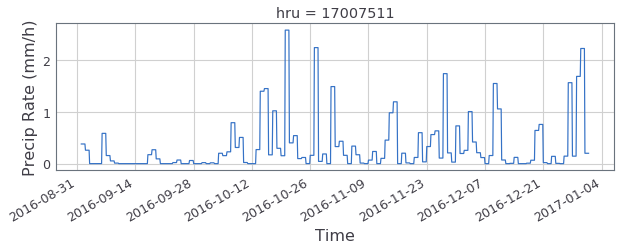

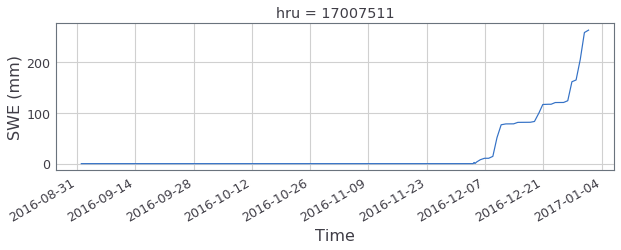

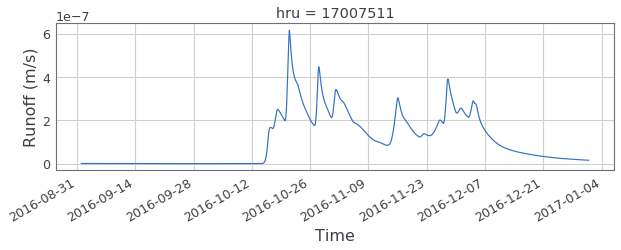

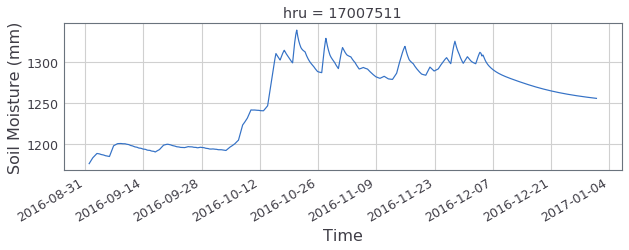

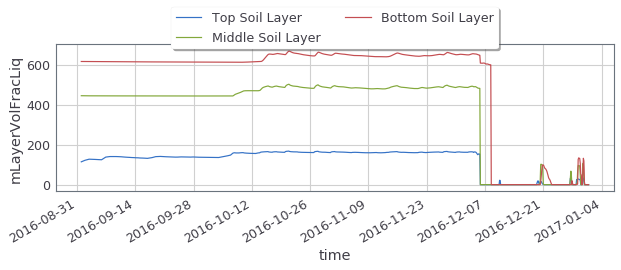

In [107]:
# PPTRATE
plt.figure(figsize=(10,3))
out.sel(hru = hid)['pptrate'].loc[starttime:endtime].plot()
plt.ylabel('Precip Rate (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/pptrate.png', bbox_inches='tight', dpi=300)
plt.show()

# SWE
plt.figure(figsize=(10,3))
out.sel(hru = hid)['scalarSWE'].loc[starttime:endtime].plot()
plt.ylabel('SWE (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/swe.png', bbox_inches='tight', dpi=300)
plt.show()

#averageInstantRunoff
plt.figure(figsize=(10,3))
out.sel(hru = hid)['averageInstantRunoff'].loc[starttime:endtime].plot()
plt.ylabel('Runoff (m/s)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/runoff.png', bbox_inches='tight', dpi=300)
plt.show()

#scalarTotalSoilWat
plt.figure(figsize=(10,3))
out.sel(hru = hid)['scalarTotalSoilWat'].loc[starttime:endtime].plot()
plt.ylabel('Soil Moisture (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/sm.png', bbox_inches='tight', dpi=300)
plt.show()

#Moisture per layer
plt.figure(figsize=(10,3))
(df2.sel(hru = hid)['mLayerVolFracLiq'][:, 0]*iden_water*0.5).loc[starttime:endtime].plot(label='Top Soil Layer')
(df2.sel(hru = hid)['mLayerVolFracLiq'][:, 1]*iden_water*1.5).loc[starttime:endtime].plot(label='Middle Soil Layer')
(df2.sel(hru = hid)['mLayerVolFracLiq'][:, 2]*iden_water*2.0).loc[starttime:endtime].plot(label='Bottom Soil Layer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=True)
plt.show()

# Best and Worst simulations

t8 and t9 are almost identical

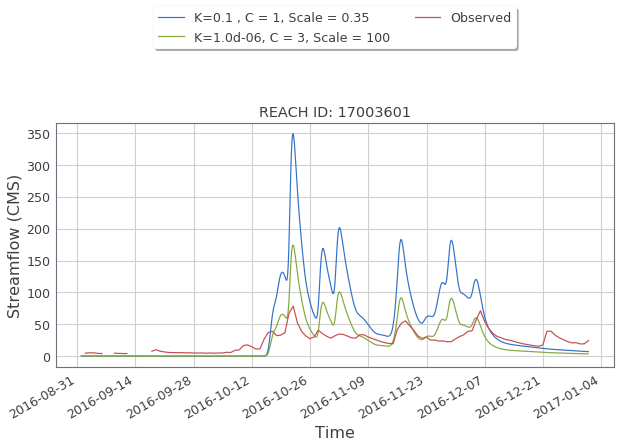

In [108]:
#Plotting all parameter tests
sid = 17003601
starttime = '2016-09-01'
endtime = '2016-12-31'

#PLOT
plt.figure(figsize=(10,5))

#t1.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06 , C = 1, Scale = 0.35')
#t2.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06 , C = 10, Scale = 0.35')
#t3.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=0.1 , C = 10, Scale = 0.35')
t4.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=0.1 , C = 1, Scale = 0.35')
#t5.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 2, Scale = 1')
#t6.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 2, Scale = 0.2')
#t7.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 3, Scale = 50')
t8.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 3, Scale = 100')
#t9.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='K=1.0d-06, C = 3, Scale = 80')
(obs['flow'].loc[starttime:endtime]).plot(label='Observed')


plt.ylabel('Streamflow (CMS)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.title('REACH ID: %i' %sid)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True, shadow=True)
plt.savefig('figures/bigbucktparamsens.png', bbox_inches='tight', dpi=300)
plt.show()

# Parameter sensitivity (Part 2) 

## Changing summerLAI

* Paramtest10: Low K(1.0d-06) and C = 3, aquiferScaleFactor = 80, summerLAI = 0.01 (Default: 3, Max 10)
* Paramtest11: Low K(1.0d-06) and C = 3, aquiferScaleFactor = 80, summerLAI = 7
* Paramtest11: Low K(1.0d-06) and C = 3, aquiferScaleFactor = 80, summerLAI = 5

## Conclusions
* The smallest summerLAI value (test 10) yields no change from default value 3 in test 9
* A large summerLAI value (test 11) seems to bring the flows together.




In [31]:
t10 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest10.nc').set_index(sSeg = 'reachID')
t11 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest11.nc').set_index(sSeg = 'reachID')
t12 = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/paramtest12.nc').set_index(sSeg = 'reachID')

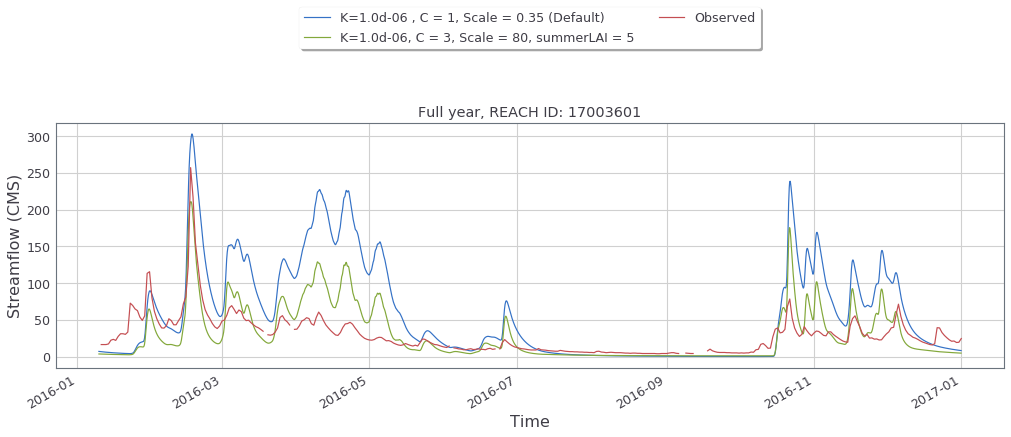

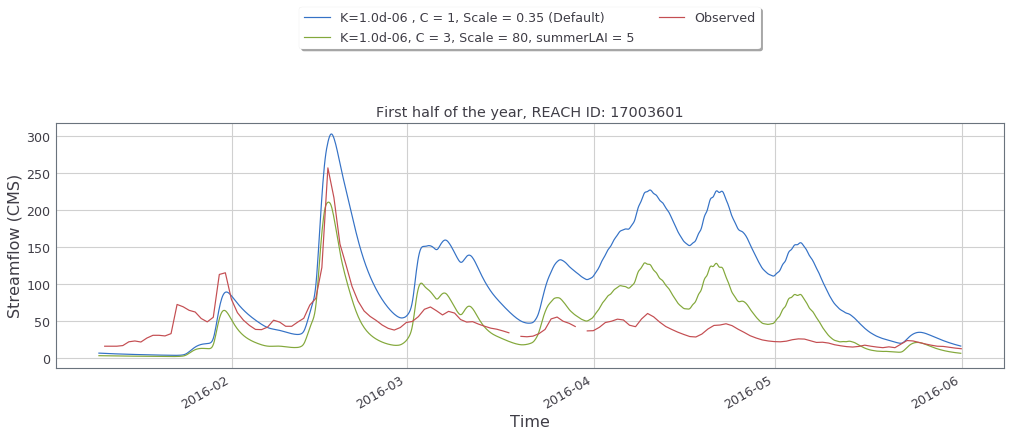

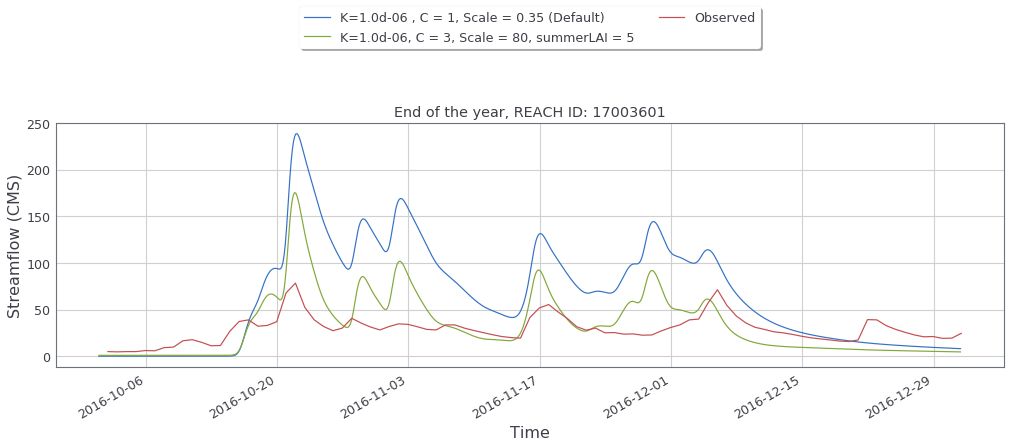

In [33]:
sid = 17003601
starttime2 = '2016-01-10'
endtime2 = '2016-12-31'

#PLOT 1
plt.figure(figsize=(17,5))
t1.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime2:endtime2].plot(label='K=1.0d-06 , C = 1, Scale = 0.35 (Default)')
t12.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime2:endtime2].plot(label='K=1.0d-06, C = 3, Scale = 80, summerLAI = 5')
(obs['flow'].loc[starttime2:endtime2]).plot(label='Observed')
plt.ylabel('Streamflow (CMS)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.title('Full year, REACH ID: %i' %sid)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True, shadow=True)
plt.show()

#PLOT 2
starttime3 = '2016-01-10'
endtime3 = '2016-05-31'

plt.figure(figsize=(17,5))
t1.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime3:endtime3].plot(label='K=1.0d-06 , C = 1, Scale = 0.35 (Default)')
t12.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime3:endtime3].plot(label='K=1.0d-06, C = 3, Scale = 80, summerLAI = 5')
(obs['flow'].loc[starttime3:endtime3]).plot(label='Observed')
plt.ylabel('Streamflow (CMS)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.title('First half of the year, REACH ID: %i' %sid)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True, shadow=True)
plt.show()

#PLOT 3
starttime3 = '2016-10-01'
endtime3 = '2016-12-31'

plt.figure(figsize=(17,5))
t1.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime3:endtime3].plot(label='K=1.0d-06 , C = 1, Scale = 0.35 (Default)')
t12.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime3:endtime3].plot(label='K=1.0d-06, C = 3, Scale = 80, summerLAI = 5')
(obs['flow'].loc[starttime3:endtime3]).plot(label='Observed')
plt.ylabel('Streamflow (CMS)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.title('End of the year, REACH ID: %i' %sid)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True, shadow=True)
plt.show()

In [10]:
t = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_3L/output/paramtest13_out/PNW3L3H_2016-01-01-00_spinup_H1_1.nc').set_index(sSeg = 'hruId')
t

<xarray.Dataset>
Dimensions:                  (gru: 1, hru: 1, midToto: 8, sSeg: 1, time: 2192)
Coordinates:
  * time                     (time) datetime64[ns] 2016-01-01 ...
  * hru                      (hru) int32 1
  * sSeg                     (sSeg) int64 17000001
Dimensions without coordinates: gru, midToto
Data variables:
    pptrate                  (time, hru) float64 ...
    airtemp                  (time, hru) float64 ...
    basin__AquiferStorage    (time, gru) float64 ...
    basin__AquiferRecharge   (time, gru) float64 ...
    basin__AquiferBaseflow   (time, gru) float64 ...
    basin__AquiferTranspire  (time, gru) float64 ...
    averageInstantRunoff     (time, gru) float64 ...
    nSnow                    (time, hru) int32 ...
    nSoil                    (time, hru) int32 ...
    nLayers                  (time, hru) int32 ...
    scalarSWE                (time, hru) float64 ...
    mLayerVolFracLiq         (time, midToto, hru) float64 ...
    scalarTotalSoilWat       (t

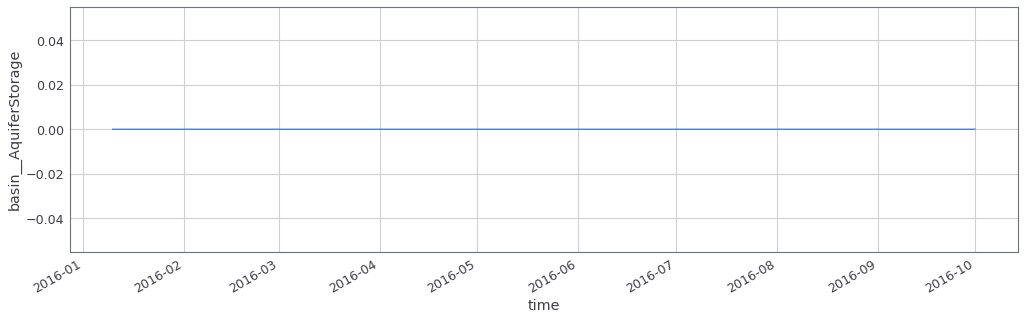

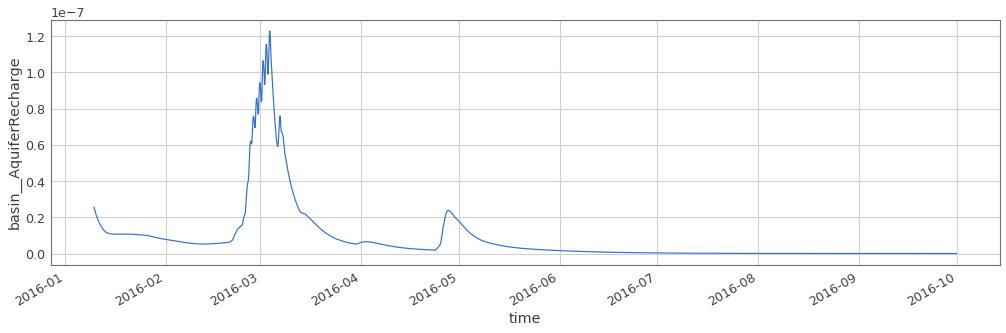

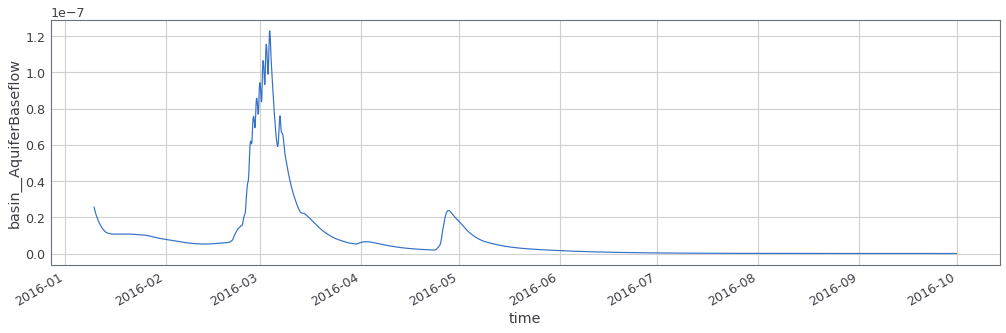

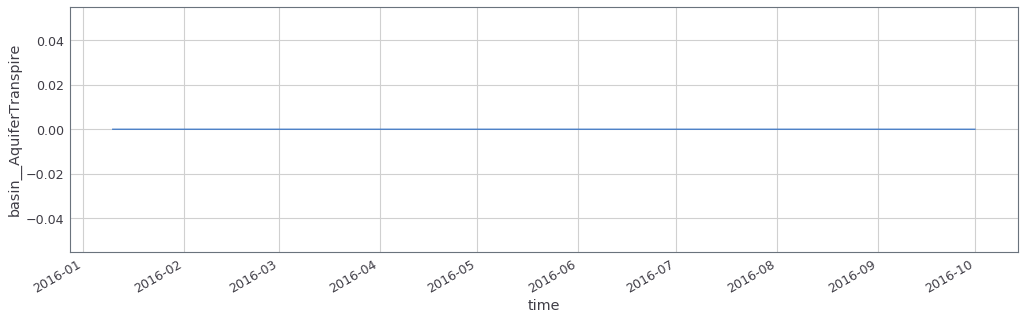

In [15]:
starttime3 = '2016-01-10'
endtime3 = '2016-12-31' 

plt.figure(figsize=(17,5))
t['basin__AquiferStorage'].loc[starttime3:endtime3].plot()
plt.show()

plt.figure(figsize=(17,5))
t['basin__AquiferRecharge'].loc[starttime3:endtime3].plot()
plt.show()

plt.figure(figsize=(17,5))
t['basin__AquiferBaseflow'].loc[starttime3:endtime3].plot()
plt.show()

plt.figure(figsize=(17,5))
t['basin__AquiferTranspire'].loc[starttime3:endtime3].plot()
plt.show()


# FULL ANALYSIS FOR A SINGLE RUN